# Programming exercises in Simulations, Machine Learning and Statistics.

One way to learn a new programming lanugages is to replicate classical problems from statistics or mathematics. In this notebook you'll be asked to perform 3 such exercises:

**A. Approximating $\pi$ using Monte Carlo simulations in Julia,**

**B. Demonstrating the curse of dimentionality in Machine Learning,**

**C. Constructing a statistical test indicating a trully superior player of table football match.**

## A. Approximating $\pi$ using Monte Carlo simulations in Julia 

The very first such exercise is to calculate numerically the approximate value of the number $\pi$ according to the algorithm given on [Wikipedia](https://en.wikipedia.org/wiki/Monte_Carlo_method#Overview). Following code will demontrate how to:
1. Define a function $\pi(n)$ that returns an approximation of $\pi$ for a number of simulations equal to $n$,
2. Run $\pi(n)$ function for: $10 ^ k$ number of simulations where $k\in [1, 2, 3, 4, 5, 6]$,
3. Plot the estimate of $\pi$ against the number of simulations,
4. For $k\in [1, 2, 3, 4, 5, 6]$ run $10000$ simulations each and calculate the $5\%$ and $95\%$ percentiles and averages. Draw a graph showing how these percentiles and the average change with $k$.

Following solutions were developed to use as few letters of code as possible. Thefore, the code readabilty might be partially lost. Check, if you could come up with maybe even shorter code.

We start with loading necessary packages:


In [32]:
using StatsBase
using Plots

### A.1. Defining a function $\pi(n)$ that returns an approximation of $\pi$ for a number of simulations equal to $n$

Function $\pi(n)$ can be easily defined by a following 1-liner as below:

In [33]:
π(n)=4*mean(sqrt.(sum(rand(n,2).^2,dims=2)).<1)

π (generic function with 1 method)

Let's deconstruct what's happending inside the body of function $\pi(n)$:
- `rand(n,2)` simulates a $n \times 2$ matrix populated with random numbers generated from uniform distribution from $0$ to $1$, i.e. $\sim U(0,1)$, Those two columns represent $(x,y)$ points disbriuted equally on the square $1 \times 1$,
- `.^2` is broadcasting (element-wise) operator for an exponent to the power of $2$ resulting in the pair $(x^2, y^2)$,
- `sum(A::AbstractArray; dims)' - sums elements of an array over the second dimension, resulting in $x^2 + y^2$,
- 'sqrt()` function taking the square of $x^2 + y^2$ and resulting in $\sqrt{x^2 + y^2}$ interpreted as a distance from $(0, 0)$,
- `.<` is a broadcasting operator of $<$ relationship returning logical values indicating whether randomly drawn $(x, y)$ belongs to the within of a circle,
- `mean()` function calculate an average over logical values by assuming `false` to be $0$ and `true` to be $1$, interpreted as $\frac{1}{4}$ of circle area,
- $4\times$ multiplication of the `mean` results in approximated whole cirle area (`mean` provided with just a $\frac{1}{4}$ of circle area).

### A.2. Running $\pi(n)$ function for: $10 ^ k$ number of simulations where $k\in [1, 2, 3, 4, 5, 6]$

In [34]:
k=6
approx_πs = π.(10 .^(1:k))

6-element Vector{Float64}:
 2.8
 3.28
 3.128
 3.1356
 3.13856
 3.143916

- we start within initializing `k` to `6` by `k=6`, 
- then we create a `k`-element vector consisting of our function results. Note that our $\pi$ is followed by dot symbol `.` to denote the fact that this function is run sequentially for each element of input vector spererately. By analogy, exponent symbol `^` is proceeded by a dot `.`. Arithmetic counter from $1$ to `k` is generated by `1:k`.

### A.3. Ploting the single estimates of $\pi$ against the number of simulations

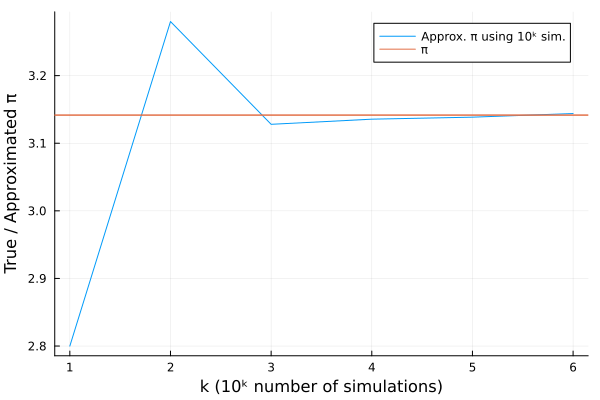

In [35]:
plot(1:k, approx_πs,
    label = "Approx. π using 10ᵏ sim.",
    xlabel = "k (10ᵏ number of simulations)",
    ylabel = "True / Approximated π")
hline!([1, k],[pi, pi], label = "π")

Try to run this and preceeding cell a few time. You should notice that the right-hand (for $k \geq 4$) part of blue lines is relativaly stable between runs, while left-hand ($k\leq3$) side more random. It's due to higher variance of approximation for smaller sample sizes, as we'll demonstrate in a next plot.

### A.4. Drawing a graph showing how percentiles and  average change with $k$

In [36]:
sim_n = 10 ^ 3

1000

In [37]:
sims = [π(10^j) for i in 1:sim_n,  j in 1:k]

1000×6 Matrix{Float64}:
 3.2  3.0   3.184  3.1064  3.13932  3.14156
 2.8  3.0   3.104  3.1364  3.14364  3.14087
 3.6  3.16  3.208  3.1564  3.14444  3.14465
 2.8  3.12  3.216  3.1392  3.13708  3.14194
 2.4  2.92  3.176  3.1572  3.1384   3.14095
 3.2  3.24  3.22   3.1452  3.13784  3.14324
 2.4  2.96  3.08   3.1408  3.14728  3.14132
 3.2  2.72  3.092  3.1132  3.14208  3.14116
 3.2  3.16  3.14   3.1456  3.14996  3.14243
 3.6  2.92  3.152  3.13    3.14972  3.14448
 2.8  3.12  3.22   3.1576  3.1416   3.14202
 3.2  3.36  3.156  3.16    3.137    3.13984
 2.0  3.24  3.068  3.1288  3.12936  3.14413
 ⋮                                  ⋮
 3.2  2.88  3.212  3.1624  3.14128  3.1421
 3.6  2.92  3.196  3.1032  3.13708  3.14162
 4.0  3.32  2.996  3.1196  3.13972  3.14259
 3.6  3.2   3.116  3.1288  3.14148  3.1425
 2.8  3.44  3.152  3.1396  3.13764  3.14169
 3.2  3.16  3.104  3.1724  3.138    3.14271
 3.2  3.24  3.136  3.1344  3.13452  3.14242
 2.0  3.28  3.244  3.154   3.15324  3.14429
 3.2  3.12  3.16

In [38]:
statistics=[[mean(sims[:,j]),
            percentile(sims[:,j], 5),
            percentile(sims[:,j], 95)] for j in 1:k]

6-element Vector{Vector{Float64}}:
 [3.149200000000004, 2.3800000000000012, 4.0]
 [3.148640000000003, 2.88, 3.4]
 [3.14412, 3.056, 3.2322000000000006]
 [3.1420672, 3.11358, 3.1688]
 [3.1417416400000016, 3.13339, 3.1501219999999996]
 [3.1415607279999995, 3.1388352, 3.1442766]

Based on above results, we can interfere that for instance:
- there's a high risk of $10\%$ that $\pi$ approximated on 10 drawings will be higher than $4$ or lower than $2.4$,
- $100000$ simulations is enough to achieve $+/-0.01$ accuracy of $\pi$ approximation $90\%$ times
- $1000$ simulations is enough to achieve $+/-0.1$ accuracy of $\pi$ approximation $90\%$ times

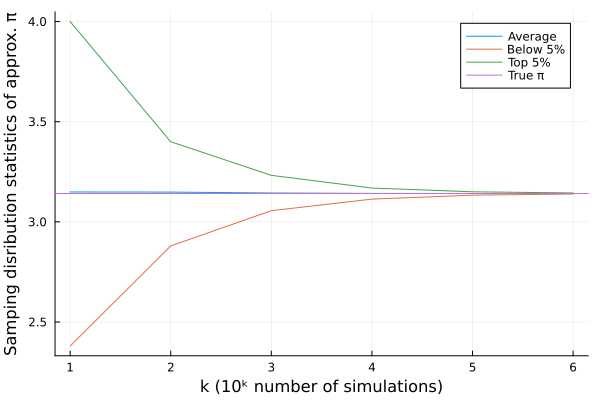

In [39]:
plot(1:k, reduce(hcat, statistics)',
    label =["Average" "Below 5%" "Top 5%"],
    xlabel = "k (10ᵏ number of simulations)",
    ylabel = "Samping disribution statistics of approx. π")
hline!([1, k],[pi, pi], label="True π")

The generated above graph shows how the accuracy of $\pi$ approximation increases with the number of simulations measure by $5\%-$ and $95\%-$ percentiles. Note that magrinal deacrease in the width of $90\%$ approximation confidence interval is getting smaller, even though the marginal increase in number of simulations is getter larger.

### Summary

Leveraging Monte Carlo Simulations and above `Julia` code we demonstrated how one can easily approximate $\pi$ number and how the number of simulations impact the accuracy of this approximation.

## B. Demonstrating the curse of dimentionality in Machine Learning

Many Machine Learning algorithms deal with highly dimentional datasets composed of dozens, thousands or millions of variables. In such a highly dimensional spaces there's a high sparsity of data points, meaning that the local neighboard of a signle data point is sparse of other data points. The higher the dimensionality, the lower number of data points in a local neighbourhood. This phoenomana is called **the curse of dimensionality** and was coined for the very first time by **Richard Bellman** in context of dynamic programming, but now it's also fully relevent in the context of Machine Learning. The problem created by the curse of dimensionality consists in the fact that having no or sparse local neighbourhood makes it less efficient to infere especially using non-parametrics, e.g. kernel, estimation techniques. Wollowing code snippets will present , you see how to:
1. Defining a function `hypersphere(n, dim)` which uses `dim` simulations to approximate the volume of `n`-dimensional hypersphere witten in `n`-dimensional hypercube, e.g. 2-dimensional hypersphere is a circle written in a square, 3-dimensional hypersphere is a sphere written in a cube,
2. Running a function `hypersphere(n, dim)` for `n = 1000000` and `dim=1`, `2`, `3` or `4` and interpret the results,
3. Drawing plots of results of `hypersphere(n, dim)` with `n = 1000000` against `dim` argument from `1` to `14` with: (1) linear and (2) exponential Y axis scale,
4. Calculating errors of simulated fractions again a true fractions for `dim = 1`, `2` or `3`,
5. Simulating sampling distribution of Mean Square Error for `dim = 2` and `3`. Checking if, Mean Square Error difference between `dim = 2` and `dim = 3` is statistically significant.

Let's start with loading necessary packages:

In [40]:
using HypothesisTests

### B.1. Defining a function `hypersphere(n, dim)`

In [41]:
hypersphere(n, dim)=mean(sum((2*rand(n,dim) .-1).^2,dims=2).<1)

hypersphere (generic function with 1 method)

`hypersphere(n, dim)` function is the extension of $pi$ function with additional argument being `dim` which was equal to $2$ for $pi$ function and here can be controled by `dim` input argument. The remaining logic is exactly the same as in $pi()$ function above.

### B.2. Runing a function `hypersphere(n, dim)`

In [42]:
simulated_fractions = hypersphere.(10^6, 1:4)

4-element Vector{Float64}:
 1.0
 0.78511
 0.524102
 0.308767

We see that the portion of volume taken by a hypersphere within a hypercube deacreases significantly from $100\%$ for $1$-dimension, i.e. an interval written in the same interval, through $\approx79\%$ for a $2$-dimensions, i.e. a circle written in a square, and $52\%$ for a sphere written in a cube for $3$ dimesions, to $31\%$ for $4$-dimensional hypersphere written in a corresponding hypercube. From Machine Learning perspective, it means that building non-parametric predictive model, e.g. k-NN, will require ca. 3 more data, if 4 predictors will be employed instead of 1 predictor.

### B.3. Drawing plots of results of `hypersphere(n, dim)`

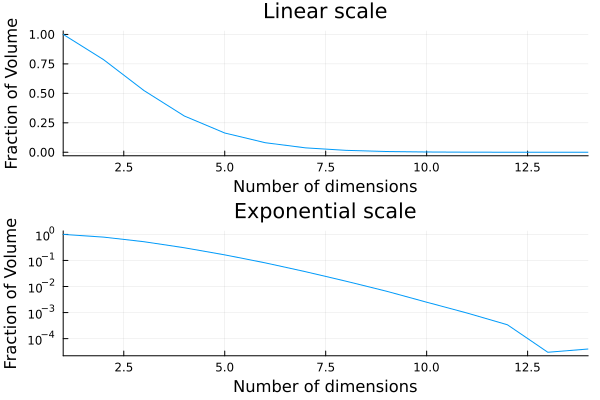

In [43]:
dims = 14
plot(1:dims, hypersphere.(100000, 1:dims), xlim = (1,dims), layout = (2,1), legend=false,
    xlabel = "Number of dimensions", ylabel = "Fraction of Volume", title = "Linear scale")
plot!(1:dims, hypersphere.(100000, 1:dims),  xlim = (1,dims), subplot=2, 
    yaxis= :log10, title = "Exponential scale", legend = false)

Based on above plots, we see a drastic decrease of volume fraction of a hypersphere written a hypercube. As we can see on the 2nd plot with an exponential scale, this decrease is effectivaly exponential.

### B.4. Calculating errors of simulated fractions

For $1$ dimension we have an $1$-long interval written in a $1$-long interval, so a true fraction is $100\%$. Simulated fractions are also exacty to the point with $0$ error:

In [44]:
simulated_fractions[1] - 1/1

0.0

For $2$ dimensions there's a quarter of circle with $r=1$ written in a $1 \times 1$ square. The field of such a quarter of circle is equal to $\frac{\pi}{4}$ and our simmulated fraction is quite close to this true value: 

In [45]:
simulated_fractions[2] - pi / 4

-0.00028816339744830444

For $3$ dimensions there's a one eighth of sphere with $r=1$ written in a $1 \times 1 \times 1 $ cube. The volume of such a one eighth sphere is equal to $\frac{4}{3} \pi / 8$ and our simmulated fraction is quite close to this true value: 

In [46]:
simulated_fractions[3] - 4/3 * pi / 8

0.0005032244017011411

Moreover, you can observe that the absolute error increases with a dimension increase. You can run a few independent simulations to check it holds true most of the times or even run significant ($>1000$) number of simulations to confirm it, which will be done in the next part.

### B.5. Simulating sampling distribution of Squared Errors


To get the sampling distribution of Squared Error (SE) for `dim = 2` and `dim = 3`, we simulate $1000$ samples for each of two dimensions using `hypersphere(10 ^ 5, dim)` function. Then the results of this function is subtracted from a true fraction and taken to the square and store in `SEs` matrix: 

In [47]:
simulations = [hypersphere(10 ^ 5, dim) for i in 1:1000, dim in 2:3]
SEs = (simulations .- [pi / 4, 4/3 * pi / 8]') .^2

1000×2 Matrix{Float64}:
 3.1566e-7   3.98444e-7
 6.75415e-7  7.76556e-7
 1.65936e-6  1.53456e-6
 1.25074e-8  4.2091e-7
 2.19177e-7  6.22167e-7
 1.66597e-7  1.60979e-6
 8.87056e-7  1.23359e-7
 8.43396e-9  3.74843e-9
 1.14354e-7  1.32532e-6
 1.38807e-6  9.23952e-7
 4.38028e-7  3.03186e-6
 1.30926e-7  1.01763e-6
 2.38304e-7  3.98444e-7
 ⋮           
 5.50322e-7  6.45782e-6
 2.38304e-7  4.88287e-7
 4.38028e-7  6.10312e-7
 4.80415e-6  1.2127e-6
 1.22803e-6  1.66094e-6
 6.37065e-7  4.28997e-6
 1.68523e-6  7.35627e-8
 4.71687e-6  7.2042e-7
 4.1691e-6   1.46954e-8
 5.50322e-7  5.16638e-7
 4.59906e-7  5.20165e-7
 7.36444e-7  4.87869e-6

Below we histogram both sampling distributions of squared errors. Even though both histogram overlaps significantly, it's still noticable that the probability mass is more to the right for higher dimension, meaning that squared errors are on average higher for a higher dimension.

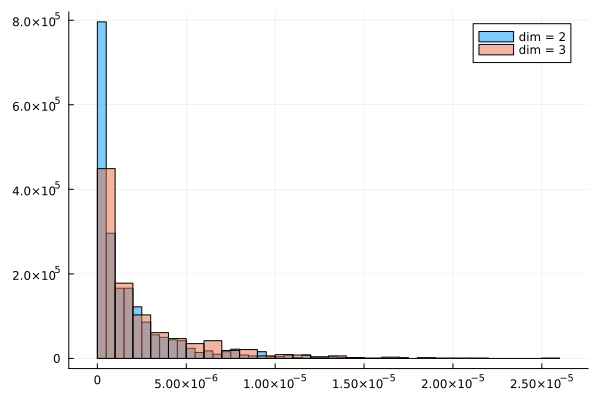

In [48]:
histogram(SEs, fillalpha=0.5, normalized=true, label=["dim = 2" "dim = 3"])

This observation is confirmed, when we calculate the Mean Squared Error for both dimensions.

In [49]:
MSE = mean(SEs, dims=1)

1×2 Matrix{Float64}:
 1.77075e-6  2.45824e-6

We see MSE for higher dimension is higher. The question is if the difference is statistiacally significant. Therefore, we run a t-test to check it.

In [50]:
OneSampleTTest(SEs[:,1], SEs[:,2])

One sample t-test
-----------------
Population details:
    parameter of interest:   Mean
    value under h_0:         0
    point estimate:          -6.87493e-7
    95% confidence interval: (-9.394e-7, -4.356e-7)

Test summary:
    outcome with 95% confidence: reject h_0
    two-sided p-value:           <1e-06

Details:
    number of observations:   1000
    t-statistic:              -5.355212748751358
    degrees of freedom:       999
    empirical standard error: 1.2837830013899841e-7


Our tets null hypothesis states that Mean Square Error are equal between both samples, i.e. $H_0: MSE_{dim=2}=MSE_{dim=3}$, while the alternative hypothesis states that MSE is higher for higher dimension , i.e.  $H_1: MSE_{dim=2} < MSE_{dim=3}$. Given our `two-sided p-value` is lower than $5\%$, we recejct the null hypothesis and state that MSE for higher dimension is higher. This result is somehow to be expected exactly due to the curse of dimensionality.

## C. Constructing a statistical test indicating a trully superior player of table football match.**

Imagine, you're playing a table football match with your friend. Typically, the game ends when the first player scores 10 goals and become a winner. Let's assume you won 10 to 5. Try to answer following questions using simulations and statistical inference in `Julia`:
- Based on that result of winning 10 to 5, can you claim you're a superior player to your oponent or maybe you had just a luck and such a result could easily occur even if both of you play on the same level? 
- What's the minimum difference of goals to allow you claim you're a superior player?
- How this minimum goals' difference will change if we allow to play not up to 10 goals but up to 20, 50 or even 100 goals?

In this secion you'll learn how to:
1. Simulating a goal difference for a single match assuming both players of the same skills' level.
2. Construct a statistical test for winner superiority.
3. Calculate a critical test value for matches played up to 100 goals.


We start with loading necessary packages for this section:

In [51]:
using Random

### C.1. Simulating a goal difference for a single match assuming both players of the same skills' level 

We start from the assumption that both players have the same level of skills. Given that the sequence of goals can be modelled as the random sequence of bits with 50% change for each bit. The sequence is trimmed/ended when the sum of either of bits reaches 10 goals. Then we calculate the difference  between 10 goals reached by a winner and number of goals scored by an oponent. Such random difference is simulated by following `goals_difference(goals_to_win)` function, where `goals_to_win` defines how many goals are required to win a match and in a default setting we assume `goals_to_win=10`:

In [52]:
function goals_difference(goals_to_win)
    match=bitrand(2 * goals_to_win - 1)
    (2 * goals_to_win .- filter(!isnothing, [findfirst(cumsum(.!match) .== goals_to_win), findfirst(cumsum(match) .== goals_to_win)]))[1]
end 

goals_difference (generic function with 1 method)

There are two lines of code in the body of `goals_difference(goals_to_win)` function:
1. Funciton `bitrand` simulates the random sequnce of `0` and `1` with each having 50% change of occuring. The lenght of the sequence is `2 * goals_to_win - 1` as this is the maximum lenght of the match in case in which the winner wins by the margin of just 1 goal.
2. Next, we want to find out how many goals were scored by a lost party to calculate the difference between him and the winner's number of goals. Therefore, we use `cumsum` calculating cummulative sum. THen we use `findfirst()` function to find first occurance of cummulative sum eqal to `gaols_to_win`, as this information allows us to infere about goals scored by an oponnent. For instance, if you won 10 to 5, then the first position reachint 10 gaols will be 15. Based on that, we can substract this value from 20 (`2 * goals_to_win`) to infere that 5 goals were scored by an opponent, which is returned by `goals_difference()` function.
Now, we can simmulate $10000$ goals' differences using `goals_difference()` function and plot a histogram of it. We see that for both players of the same skills, the distribution of goals difference will be cumulated around small number of goal difference equal to from 1 to 4, but it's not so rare to observe 5 or more difference of goals, even though players are equally good. 

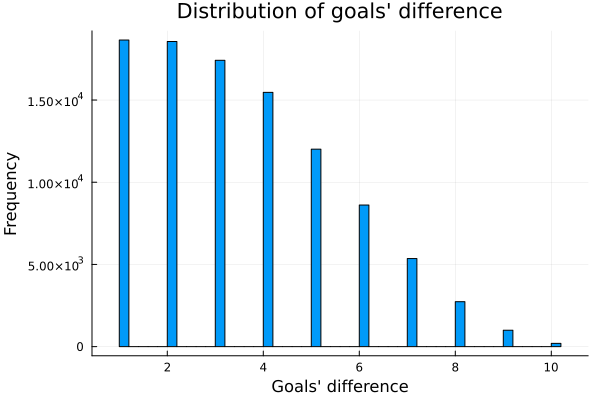

In [53]:
sample = [goals_difference(10) for _ in 1:10 ^ 5]
histogram(sample, legend = false, title = "Distribution of goals' difference",
            xlabel="Goals' difference", ylabel="Frequency")

### C.2. Constructing a statistical test for winner superiority
In our statistical test for winner superiority we have two hypothesis:

$H_0:$ both players are equally good.

$H_1:$ The winner is a better player.

Test statistic is a goal difference, which distribution under the true null hypothesis was simulated above in the histogram. To calculate a critical value of our test, we need to calculate 95th percentile of simulated distribution, which is equal to: 

In [54]:
percentile(sample, 95)

7.0

The critical value of 7 means that the winner needs to win by more than 7 goals, i.e. 8, 9 or 10, to be allowed to claim her superiority over an oponent. It means also that winning 10 to 7 or less is not enough to claim it. It proves that match played up to 10 goals creates very small sample, which doesn't provide a strong signal about somebody's superior skills. Let's see how long should the game take time to have more predictive power. 

### C.3 Calculating a critical test value for matches played up to 100 goals
Since the critical test value is a percentile of simulated ditribution of goals' difference for a game played up to a specific number of goals, let's calculate it for other than 10 goals needed to win a match. We'll achive it through defining `min_signific_goal_diff()`:

In [55]:
function min_signific_goal_diff(goals_to_win;  significance_level = 0.05, n_sim = 10000)
    percentile([goals_difference(goals_to_win) for _ in 1:n_sim], 100 * (1-significance_level))
end


min_signific_goal_diff (generic function with 1 method)

Let's run this function for: 5, 10 and 20 goals required to win a match and see what critical values are:

In [56]:
min_signific_goal_diff.([5 10 20])

1×3 Matrix{Float64}:
 5.0  7.0  11.0

1. Critial value for a match played up to 5 goals is 5 goals. It means that it's not possible to reject a null hypothesis with a significance level up to 5%. In other words, match up to 5 goals brings to little information to be able infere somebody's superiority in skills.
2. Critial value for a match played up to 10 goals is 7 goals and it confirms what we have already calculated and interpreted above. We run this to check if our calculations are correct and aligned.
3. Critial value for a match played up to 20 goals is 11 goals, which means it's enought to win by margin of 12 or more goals to claim a true superiority over an oponent.

We see that that critial value decrease relativaly to the number goals required to win a match. For 10 goals it was 7 goals (70%) and for 20 goals it was 11 goals (55%). Let's see more profoundly how critical value changes with the number of goals required to win a match, by drawing this plot:

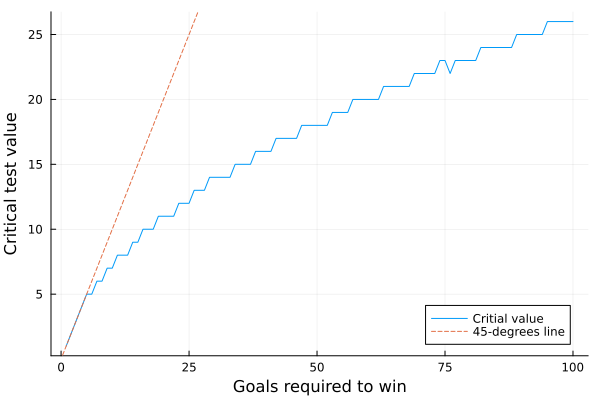

In [57]:
max_goals_to_win = 100
plot(1:max_goals_to_win, min_signific_goal_diff.(1:max_goals_to_win; significance_level=0.05),
    xlabel = "Goals required to win", ylabel="Critical test value", label = "Critial value",
    legend=:bottomright)
Plots.abline!(1, 0, line=:dash, label = "45-degrees line")

The plot illustrates how the critical test value changes with the number of goals required to win. We see that this blue line is concave, meaning that from each additional goal required to win the lesser proportion is required to be scored by a winner to prove her superiority in statistically significant way. Moreover, you might see (depending on a simulation seed) that blue line might decrease at some points. This is due to the sample randomness and estimation error of critial value resulted from the fact that test static is simulated on a limited sample. To improve the estimation the sample number should be increased.  

*Preparation of this workshop has been supported by the Polish National Agency for Academic Exchange under the Strategic Partnerships programme, grant number BPI/PST/2021/1/00069/U/00001.*

![SGH & NAWA](logo.png)